In [ ]:
reset()

In [ ]:
def vector_puntos(P,Q):
    
    # Input: puntos P y Q
    # Output: vector PQ
    
    return (P.augment(Q))*matrix([[-1],[1]])

def producto_escalar(U,V):
    
    # Input: vectores U y V
    # Output: escalar U*V    
    
    return (transpose(U)*V)[0,0]

def modulo(U):
    
    # Input: vector U 
    # Output: escalar ||U||    
    
    return sqrt(producto_escalar(U,U))

def vector_unitario(U):
    
    # Input: vector U 
    # Output: vector unitario en la misma dirección y sentido que U    
    
    return U/modulo(U)

def coseno_del_angulo_que_forman(U,V):
    
    # Input: vectores U y V 
    # Output: escalar que representa el coseno del ángulo que forman U y V        
    
    return producto_escalar(U,V)/(modulo(U)*modulo(V))

def producto_vectorial(U,V):
    
    # Input: vectores U y V 
    # Output: vector producto vectorial UxV   
    
    W0 = U[1,0]*V[2,0] - U[2,0]*V[1,0]
    W1 = -U[0,0]*V[2,0] + U[2,0]*V[0,0]
    W2 = U[0,0]*V[1,0] - U[1,0]*V[0,0]
    return matrix([[W0],[W1],[W2],[0]])

In [ ]:
def traslacion(D): 
    
    #INPUT: vector D en coordenadas homogéneas
    #OUTPUT: matriz de traslación
         
    return matrix([[1,0,0,D[0,0]],[0,1,0,D[1,0]],[0,0,1,D[2,0]],[0,0,0,1]]) 

def rotacion(eje,angulo):
    
    #INPUT: eje='x', 'y' o 'z'
    #       angulo en radianes
    #OUTPUT: matriz de rotación
    
    if eje == 'x':
        M= matrix([[1,0,0,0],[0,cos(angulo),-sin(angulo),0],[0,sin(angulo),cos(angulo),0],[0,0,0,1]])
    elif eje == 'y':
        M= matrix([[cos(angulo),0,sin(angulo),0],[0,1,0,0],[-sin(angulo),0,cos(angulo),0],[0,0,0,1]])    
    else:
        M= matrix([[cos(angulo),-sin(angulo),0,0],[sin(angulo),cos(angulo),0,0],[0,0,1,0],[0,0,0,1]])   
        
    return M

def rotacion_coseno(eje,coseno,seno):
    
    #INPUT: eje='x', 'y' o 'z'
    #       angulo en radianes
    #OUTPUT: matriz de rotación
    
    if eje == 'x':
        M= matrix([[1,0,0,0],[0,coseno,-seno,0],[0,seno,coseno,0],[0,0,0,1]])
    elif eje == 'y':
        M= matrix([[coseno,0,seno,0],[0,1,0,0],[-seno,0,coseno,0],[0,0,0,1]])    
    else:
        M= matrix([[coseno,-seno,0,0],[seno,coseno,0,0],[0,0,1,0],[0,0,0,1]])   
        
    return M

def escalado(r):  
    
    #INPUT: r=[rx,ry,rz]
    #OUTPUT: matriz de rotación
         
    return matrix([[r[0],0,0,0],[0,r[1],0,0],[0,0,r[2],0],[0,0,0,1]]) 

def simetria(N):
    
    #INPUT: N vector normal al plano de simetría en coordenadas homogéneas
    #OUTPUT: matriz de simetría
    
    N = N/norm(N)
    I = matrix([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])
    
    return I-2*N*N.transpose()

def sesgo(direccion,ang1,ang2):
    
    #INPUT: direccion ='x', 'y' o 'z'
    #       angulos ang1 y ang2  en radianes
    #OUTPUT: matriz de sesgo

    if direccion == 'x':
        M= matrix([[1, tan(ang1), tan(ang2), 0],[0, 1, 0, 0],[0, 0, 1, 0],[0, 0, 0, 1]])
    
    elif direccion == 'y':
        M= matrix([[1 ,0 ,0 ,0],[ tan(ang1), 1, tan(ang2), 0],[0, 0, 1, 0],[0, 0, 0, 1]])
    
    else:
        M= matrix([[1, 0, 0, 0],[0, 1, 0, 0],[tan(ang1), tan(ang2), 1, 0],[0, 0, 0, 1]])
        
    return M

def sesgo_tangente(direccion,tan1,tan2):
    
    #INPUT: direccion ='x', 'y' o 'z'
    #       tangentes de los angulos ang1 y ang2 
    #OUTPUT: matriz de sesgo

    if direccion == 'x':
        M= matrix([[1, tan1, tan2, 0],[0, 1, 0, 0],[0, 0, 1, 0],[0, 0, 0, 1]])
    
    elif direccion == 'y':
        M= matrix([[1 ,0 ,0 ,0],[ tan1, 1,tan2, 0],[0, 0, 1, 0],[0, 0, 0, 1]])
    
    else:
        M= matrix([[1, 0, 0, 0],[0, 1, 0, 0],[tan1, tan2, 1, 0],[0, 0, 0, 1]])
        
    return M

In [ ]:
def dibujar_poligono(vertices,**kwds):
    
    # Input: matriz con los vértices del polígono por columnas
    # Output: gráfica del polígono
    
    return polygon(tuple(vertices[0:3].transpose()),axes=False,**kwds)

def dibujar_poligono_delimitado(vertices,**kwds):
    
    # Input: matriz con los vértices del polígono por columnas
    # Output: gráfica del polígono con el borde negro degrosor 50
    
    V = list(vertices[0:3].transpose())
    dib = polygon(V,axes=False,**kwds)
    V.extend(vertices[0:3,0].transpose())
    dib += line3d(V, axes=False, color ='black', thickness=50)
    return dib

def dibujar_mallado_poligonal_delimitado(vertices,caras,**kwds):
    
    # Input: matriz con los vértices del polígono por columnas y matriz de caras.
    # Output: gráfica del mallado.
    
    mallado = 0
    for cara in caras:        
        indices = [n for n in cara if n>-1]
        vertices_de_la_cara = vertices[:,indices]
        mallado = mallado + dibujar_poligono_delimitado(vertices_de_la_cara,**kwds)
        
    return mallado

def dibujar_punto(P,**kwds):
    
    #Input: punto P
    #Output: gráfica del punto
    
    return points(P[0:3].column(0),**kwds)

# Mallado base 1:

Considera el mallado definido en la celda siguiente, que modela un mallado base consistente en dos prismas triangulares (uno con superficie amarilla, el otro con superficie naranja), pegados por la cara que comparten, situada en el plano $x=0$.  

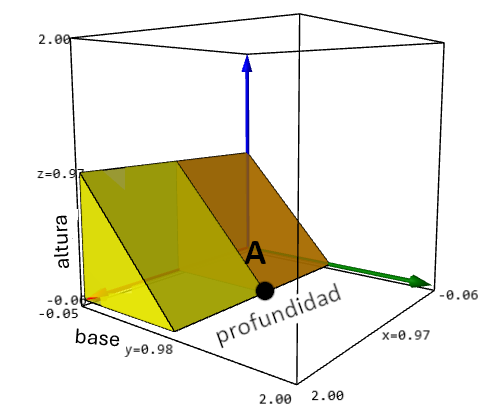

In [ ]:
# Mallado base
va = matrix([[2,0,0,1],[2,1,0,1],[2,0,1,1],[1,0,0,1],[1,1,0,1],[1,0,1,1]]).transpose() # vértices caras amarillas
vn = traslacion(matrix([[-1],[0],[0],[0]]))*va                                         # vértices caras naranjas
caras = matrix([[0,1,2,-1],[1,0,3,4],[2,1,4,5],[0,2,5,3],[3,5,4,-1]])                  # matriz de caras

In [ ]:
dib_a = dibujar_mallado_poligonal_delimitado(va,caras,color='yellow', alpha = 0.8)
dib_n = dibujar_mallado_poligonal_delimitado(vn,caras,color='orange', alpha = 0.8)

dib_base = dib_a + dib_n 

# Ejes
ejex = arrow3d((0, 0, 0), (2.5, 0, 0), color='red', width=1)
ejey = arrow3d((0, 0, 0), (0, 2, 0), color='green', width=1)
ejez = arrow3d((0, 0, 0), (0, 0, 2), color='blue', width=1)

dib_ejes = ejex + ejey + ejez

A = matrix([1,1,0,1]).transpose()
dib_A = dibujar_punto(A, color = 'black', size=30) 

dib_base + dib_ejes + dib_A

# Mallado base 2:

Considera el mallado definido en la celda siguiente, que modela un mallado base consistente en un prisma cuadrangular situado en el plano z=0. 

In [ ]:
cubovert = matrix([[1,0,-1,1],[1,1,-1,1],[1,1,0,1],[1,0,0,1],[0,0,-1,1],[0,1,-1,1],[0,1,0,1],[0,0,0,1]]).transpose()
cubocar = matrix([[0,1,2,3],[1,0,4,5],[5,4,7,6],[2,1,5,6],[3,2,6,7],[0,3,7,4]])
cubo0 = cubovert
cubo1 = traslacion(matrix([[0],[0],[1],[0]]))*cubovert

dib_base = dibujar_mallado_poligonal_delimitado(cubo1,cubocar,color='cyan', alpha = 0.8)  

# Ejes
ejex = arrow3d((0, 0, 0), (2, 0, 0), color='red', width=1)
ejey = arrow3d((0, 0, 0), (0, 2, 0), color='green', width=1)
ejez = arrow3d((0, 0, 0), (0, 0, 2), color='blue', width=1)

dib_ejes = ejex + ejey + ejez

show(dib_base + dib_ejes)